# Roteiro da Reunião do Dia 14/08/2024

# FIR - Janela de Hamming

- A janela de Hamming é frequentemente usada para projetar os coeficientes do filtro FIR, melhorando assim sua performance ao reduzir as oscilações indesejadas no espectro da frequência.


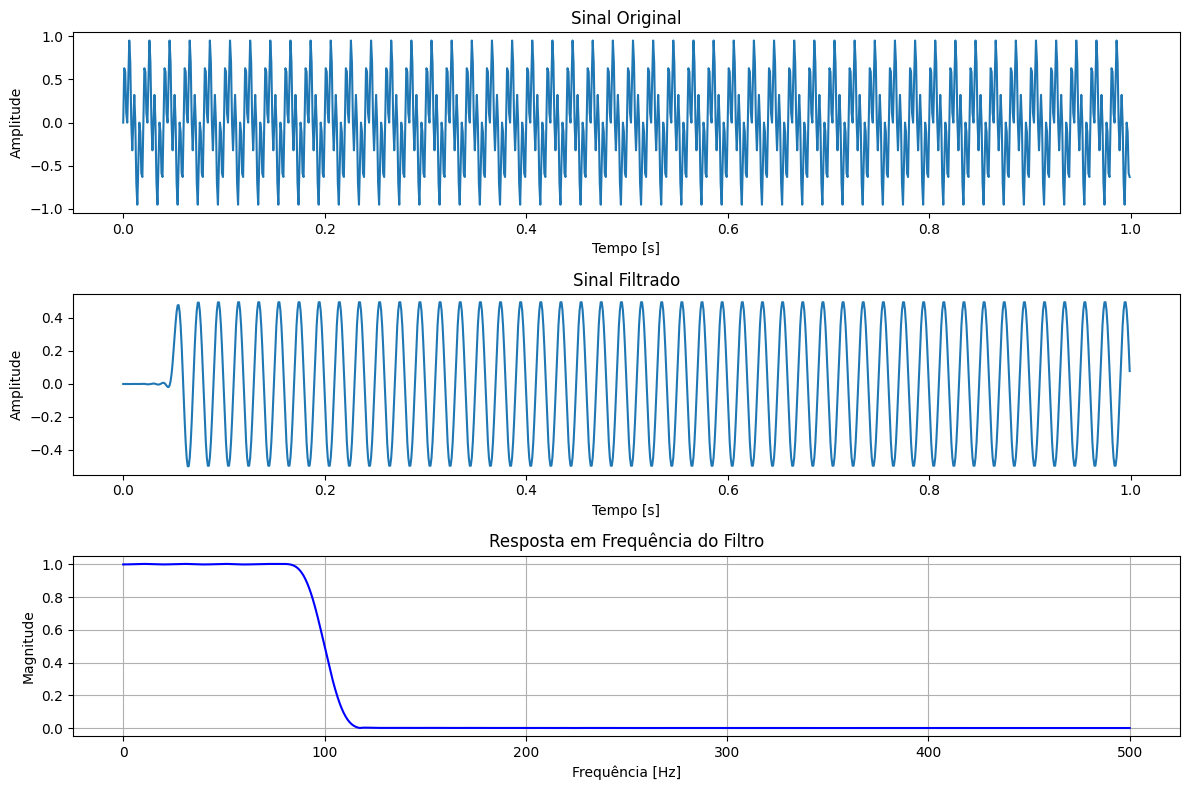

In [5]:
import numpy as np
import scipy.signal as signal 
import matplotlib.pyplot as plt

# Parâmetros do filtro
fs = 1000  # Frequência de amostragem em Hz
cutoff = 100  # Frequência de corte em Hz
numtaps = 100  # Número de coeficientes do filtro

# Projeto do filtro FIR usando janela de Hamming
b = signal.firwin(numtaps, cutoff/(0.5*fs), window='hamming')

# Gerar um sinal de exemplo (sinal composto por duas frequências)
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Aplicar o filtro ao sinal
y = signal.lfilter(b, 1.0, x)

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

# Resposta em frequência do filtro
w, h = signal.freqz(b, worN=8000)

plt.subplot(3, 1, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

# FIR - Janela de Hanning

- Similar a janela de Hamming, a janela de Hanning possui uma atenuação ligeiramente maior do que a de Hamming, em que pode ser desejável em certar aplicações.

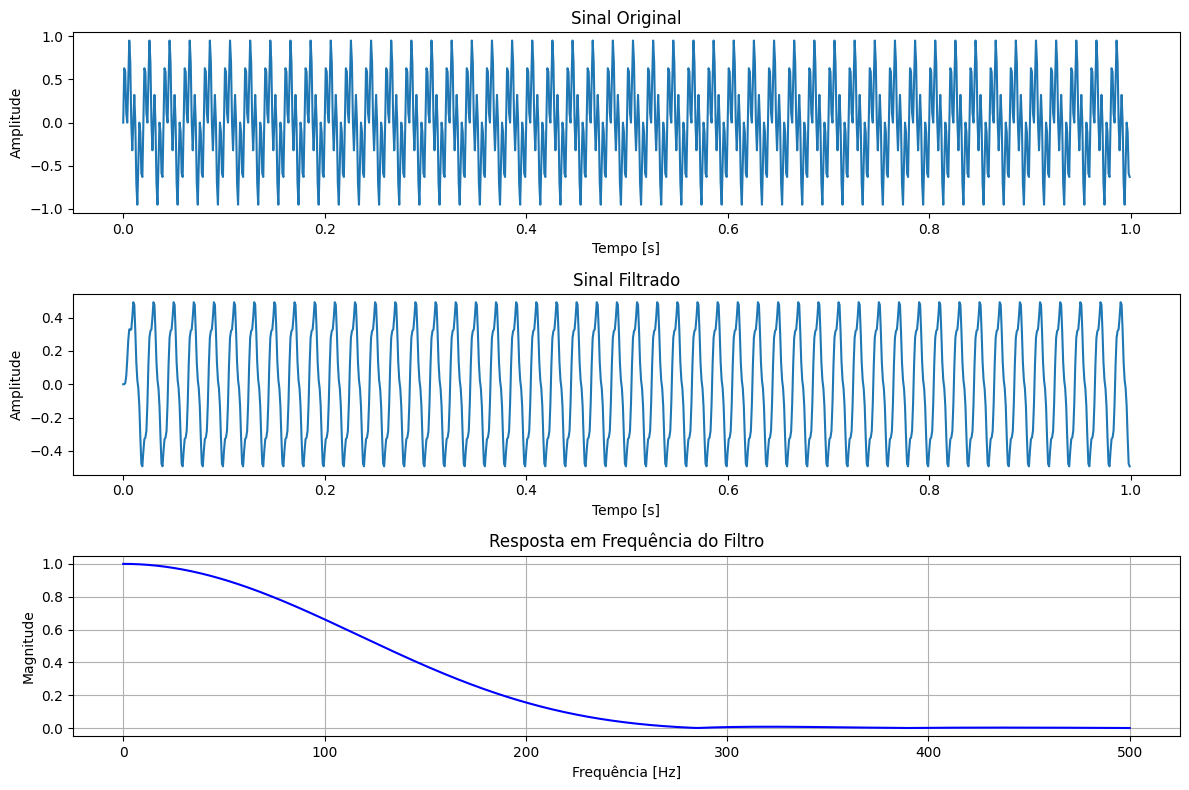

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Parâmetros do filtro
numtaps = 10  
cutoff = 100  
fs = 1000

# Criar o filtro FIR usando a janela de Hanning
b = firwin(numtaps, cutoff, window='hann', fs=fs)

# Gerar um sinal de exemplo (sinal composto por duas frequências)
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Filtrar o sinal usando o filtro FIR
y = lfilter(b, 1.0, x)

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

# Plotar a resposta em frequência do filtro
w, h = freqz(b, worN=8000)

plt.subplot(3, 1, 3)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()


# IIR - Butterworth

- Resposta em frequência suavizada;
- Plana na banda passante, sem ondulações.

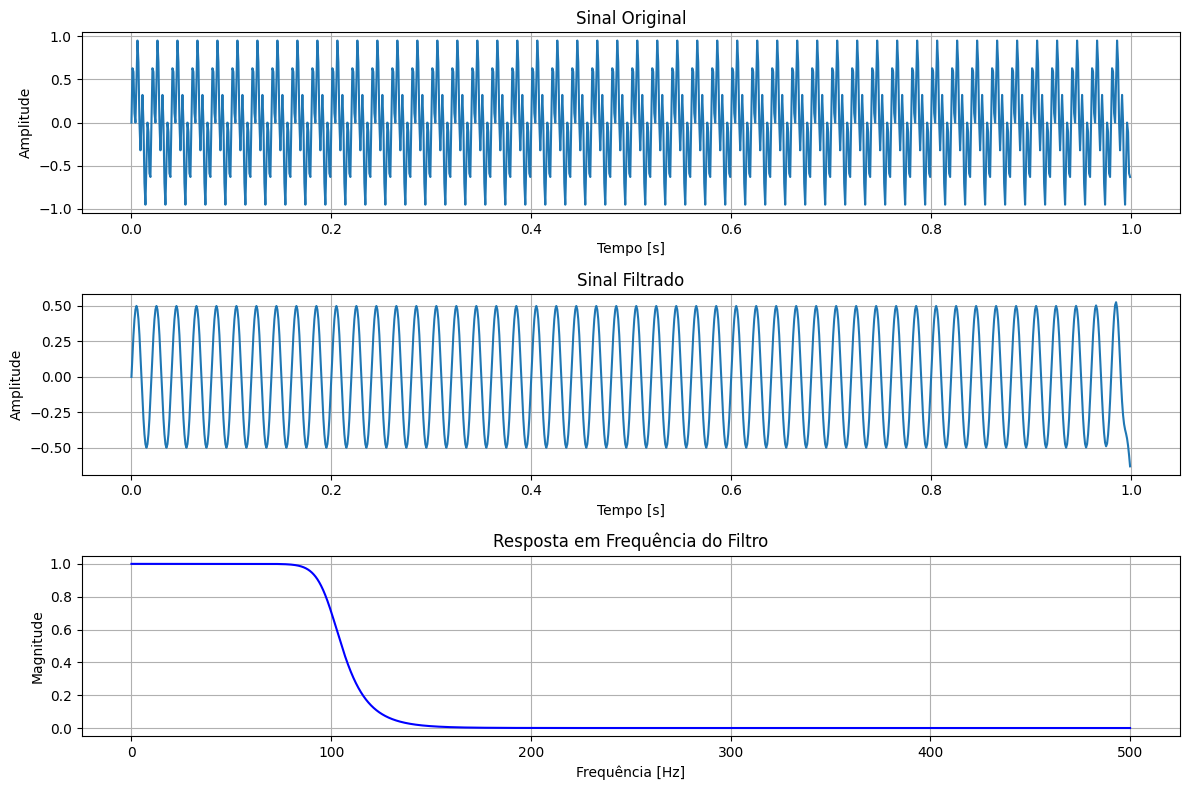

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parâmetros do sinal
fs = 1000  
cutoff = 100  
order = 10  

# Gerar um sinal
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Projeto do filtro Butterworth
b, a = butter(order, cutoff/(0.5*fs), btype='low')

# Aplicação do filtro
y = filtfilt(b, a, x)

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

# Resposta em frequência do filtro
w, h = signal.freqz(b, a, worN=8000)

plt.subplot(3, 1, 3)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()



# IIR - Chebyshev

- É um filtro conhecido por apresentar uma transição mais rápida, ou acentuada, entre as bandas passante e de rejeição.
- É dividido em duas categorias: Chebyshev Tipo I e Chebyshev Tipo II;

## Chebyshev Tipo I
- Apresenta ondulações na banda passante, mas apresenta uma transição mais acentuada da banda passante para a banda de rejeição;


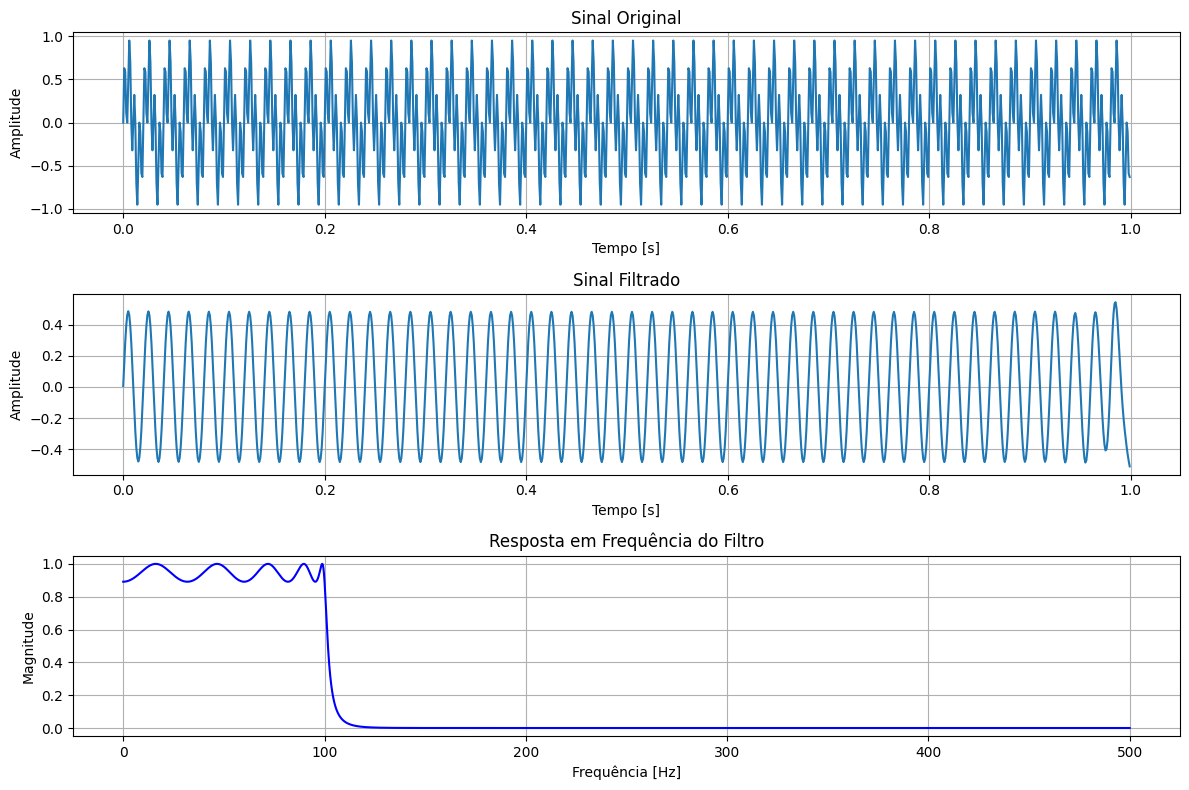

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, filtfilt

# Parâmetros do sinal
fs = 1000  
cutoff = 100  
order = 10  

# Projeto do filtro Chebyshev Tipo I
cutoff = 100  # Frequência de corte em Hz
rp = 1  # Ripple na banda passante (em dB)
order = 10  # Ordem do filtro

# Gerar um sinal
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Coeficientes do filtro
b, a = cheby1(order, rp, cutoff/(0.5*fs), btype='low')

# Aplicação do filtro
y = filtfilt(b, a, x)

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

# Resposta em frequência do filtro
w, h = signal.freqz(b, a, worN=8000)

plt.subplot(3, 1, 3)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()


# Chebyshev Tipo II
- Apresenta ondulações na banda de rejeição, mas uma resposta plana na banda passante.


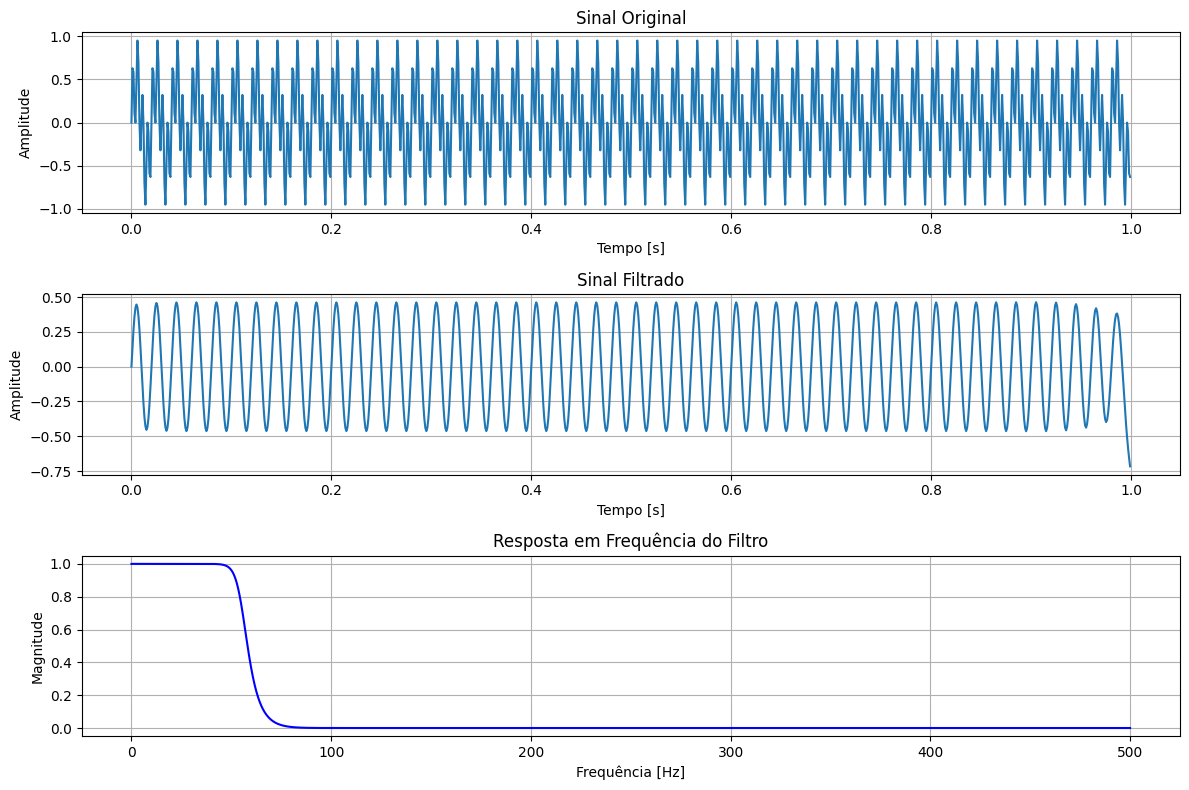

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, filtfilt

# Parâmetros do sinal
fs = 1000  
cutoff = 100  
order = 10  

# Projeto do filtro Chebyshev Tipo I
cutoff = 100  # Frequência de corte em Hz
rs = 100  # Atenuação mínima na banda de rejeição (em dB)
order = 10  # Ordem do filtro

# Gerar um sinal
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Coeficientes do filtro
b, a = cheby2(order, rs, cutoff/(0.5*fs), btype='low')

# Aplicação do filtro
y = filtfilt(b, a, x)

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

# Resposta em frequência do filtro
w, h = signal.freqz(b, a, worN=8000)

plt.subplot(3, 1, 3)
plt.plot(0.5*fs* w/np.pi, np.abs(h), 'b')
plt.title('Resposta em Frequência do Filtro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

# Filtro eliptico 


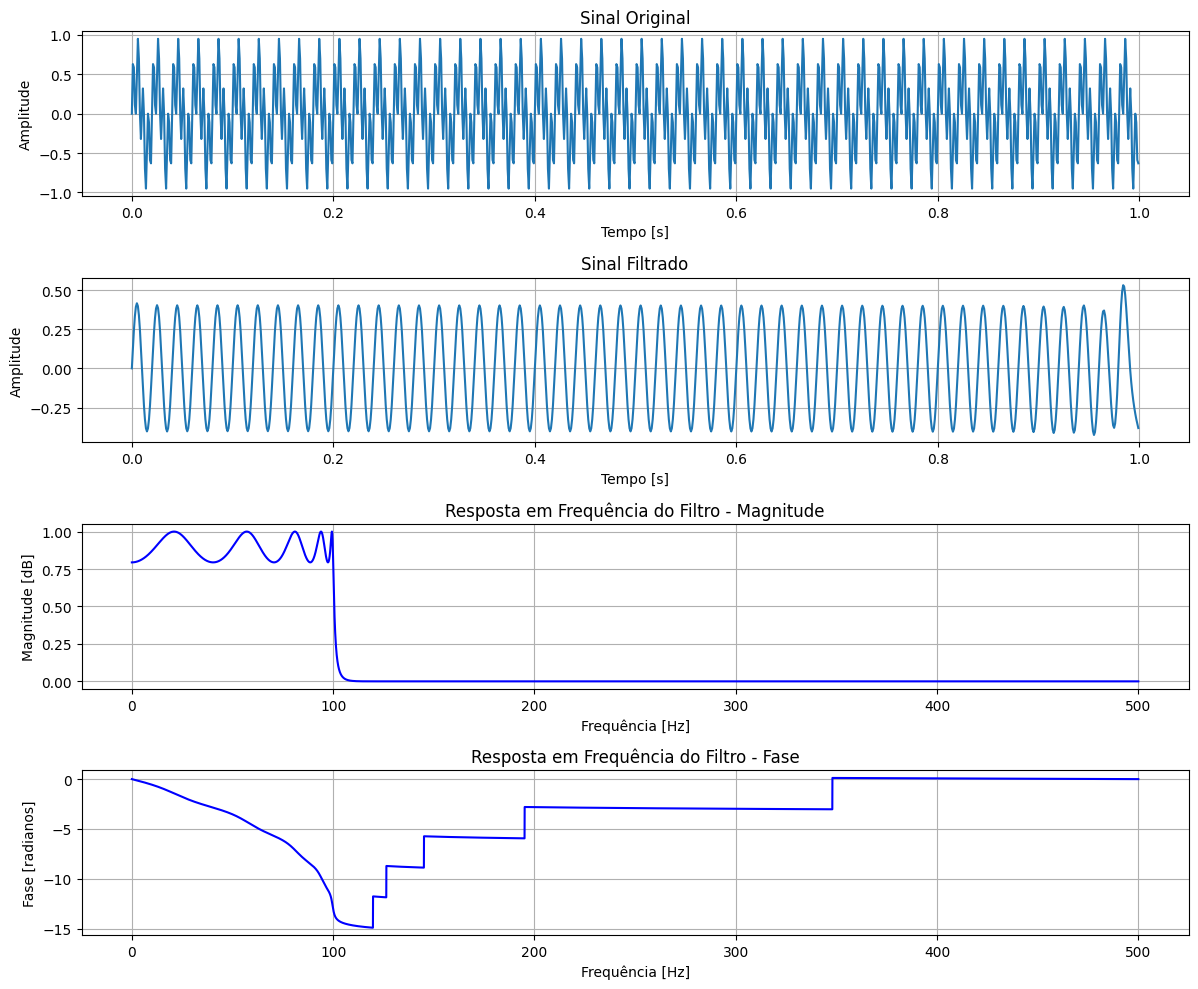

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellip, filtfilt, freqz

# Parâmetros do sinal e do filtro
fs = 1000           # Frequência de amostragem em Hz
cutoff = 100        # Frequência de corte em Hz
order = 10          # Ordem do filtro
rp = 2             # Ondulação máxima na banda de passagem (em dB)
rs = 100            # Atenuação mínima na banda de rejeição (em dB)

# Gerar um sinal
t = np.arange(0, 1.0, 1/fs)  # Tempo de 1 segundo
x = 0.5 * np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)  # Sinal com frequências 50 Hz e 200 Hz

# Projeto do filtro elíptico
b, a = ellip(order, rp, rs, cutoff/(0.5*fs), btype='low')

# Aplicação do filtro
y = filtfilt(b, a, x)

# Plotar os resultados
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, y)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()

# Resposta em frequência do filtro
w, h = freqz(b, a, worN=8000)

plt.subplot(4, 1, 3)
plt.plot(0.5*fs*w/np.pi, abs(h), 'b')
plt.title('Resposta em Frequência do Filtro - Magnitude')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(0.5*fs*w/np.pi, np.unwrap(np.angle(h)), 'b')
plt.title('Resposta em Frequência do Filtro - Fase')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Fase [radianos]')
plt.grid()

plt.tight_layout()
plt.show()
